1. [Dual Moving Average Strategy](#Dual-Moving-Average-Strategy)

1. [Pyfolio Backtesting](#Pyfolio-Backtesting)

## Import libraries

In [2]:
import pandas as pd
import pyfolio as pf
from joblib import load
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import zipline
%load_ext zipline

# Dual Moving Average Strategy
<a id = "Dual Moving Average Strategy"></a>

## Baseline Strategy

There are two common strategies in finance: <i>momentum strategy</i>, usually referred to as trend trading and, the opposite, <i>reversion strategy</i>, frequently known as convergence or cycle trading. In this project, we will focuse on momentum strategies, whereby we will exploit upward/downward trends of our stock.<br> 

More concretely, we will perform a **dual moving average crossover**, which occurs when a short-term average crosses a long-term average. This signal is used to identify that momentum is shifting in the direction of the short-term average. A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it.<br>

We customise one of [zipline examples](#https://github.com/quantopian/zipline/tree/master/zipline/examples) next, with the following specifications:
<ul>
    <li>the series'unit has been left as prices, more information on <code>03_ml_strategy.ipynb</code></li>
    <li>initial capital base of 10.000 USD</li>
    <li>trading period of 635 days (corresponding to the last ML model's test cross-validation sample <code>03_ml_strategy.ipynb</code>, from 2015-5-13 to 2018-3-15</li>
    <li>moving average windows also correspond to ML model's lagged and predicted values <code>03_ml_strategy.ipynb</code>, so as to facilitate comparison, if any</li>
    <li>in line with the aforementioned dual moving average crossover, if the fast (short-term) moving average crosses up the slow (long-term) moving average, we trade 100 shares and viceversa</li>
    <li>no commissions or slippage have been defined</li>
</ul>

In [62]:
%%zipline --start 2015-5-13 --end 2018-3-15 --capital-base 10000.0 -o ../strategies/models/dma_strategy.joblib --no-benchmark -b quandl

from zipline.api import order, record, symbol

# parameters 
stock = 'AAPL'
slow_ma_periods = 32
fast_ma_periods = 8

def initialize(context):
    context.time = 0
    context.asset = symbol(stock)
    context.has_position = False
    
def handle_data(context, data):
    context.time += 1
    if context.time < slow_ma_periods:
        return

    fast_ma = data.history(context.asset, 'price', bar_count=fast_ma_periods, frequency="1d").mean()
    slow_ma = data.history(context.asset, 'price', bar_count=slow_ma_periods, frequency="1d").mean()

    # Trading logic
    if (fast_ma > slow_ma) & (not context.has_position):
        order(context.asset, 100)
        context.has_position = True
    elif (fast_ma < slow_ma) & (context.has_position):
        order(context.asset, -100)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           fast_ma=fast_ma,
           slow_ma=slow_ma)

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,slow_ma,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-05-13 20:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,1,[],0.0
2015-05-14 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,2,[],0.0
2015-05-15 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,3,[],0.0
2015-05-18 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,4,[],0.0
2015-05-19 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,5,[],0.0
2015-05-20 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,6,[],0.0
2015-05-21 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,7,[],0.0
2015-05-22 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,8,[],0.0
2015-05-26 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,9,[],0.0
2015-05-27 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,10,[],0.0


We then load our strategy for further analysis and we plot
<ol>
    <li>stock price and two moving averages</li>
    <li>portfolio's value</li>
</ol>
For an interactive plot with altair, please refer to <code>04_trading_viz.ipynb</code>

In [21]:
dma = pd.read_csv('../reports/dma_strategy.csv', parse_dates=True)

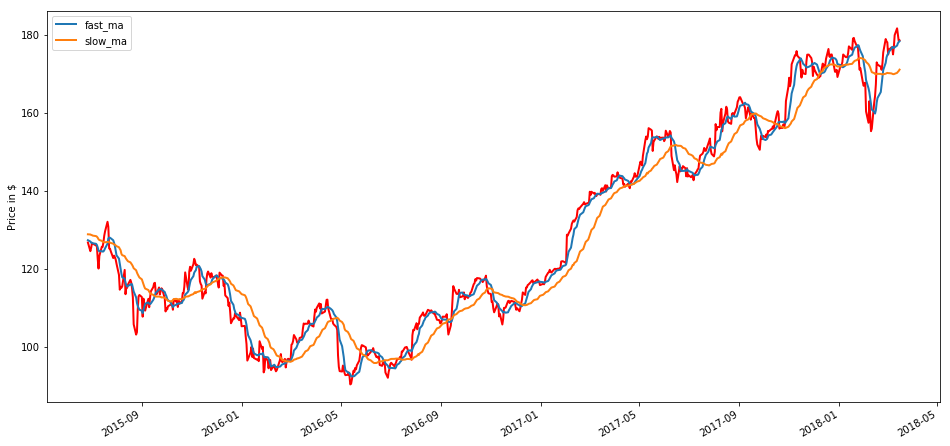

In [66]:
# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))      

# Subplot for axes 2
ax1 = fig.add_subplot(111, ylabel='Price in $')

# Plot the price and two moving averages
dma['price'].plot(ax=ax1, color='r', lw=2.)
dma[['fast_ma', 'slow_ma']].plot(ax=ax1, lw=2.)

# Plot the buy and sell signals
ax1.plot(dma.loc[dma.positions == 1.0].index, 
         dma['fast_ma'][dma['positions'] == 1.0],
         '^', markersize=10, color='m')
ax1.plot(dma.loc[dma.positions == -1.0].index, 
         dma['fast_ma'][dma['positions'] == -1.0],
         'v', markersize=10, color='k')

plt.show()

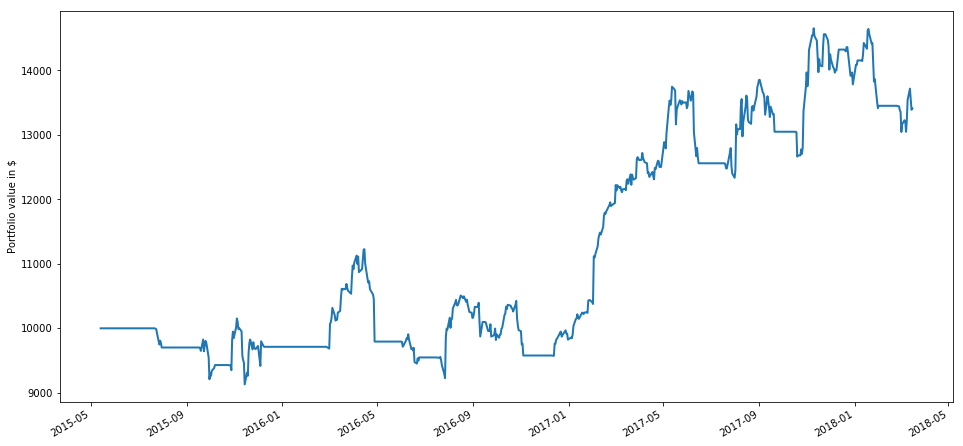

In [67]:
# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))      

# Subplot for axes 1
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
dma['portfolio_value'].plot(ax=ax1, lw=2.)

ax1.plot(dma.loc[dma.positions == 1.0].index, 
         dma['portfolio_value'][dma.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(dma.loc[dma.positions == -1.0].index, 
         dma['portfolio_value'][dma.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

And finally, we retrieve our portfolio value on our last trading day and the sum of capital used during the trading period.

In [13]:
dma['portfolio_value'].iloc[-1]

13410.340499999995

In [14]:
dma.capital_used.sum()

-14454.659499999987

# Pyfolio Backtesting
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Pyfolio is a common tool for trading strategy backtesting that is integrated in Zipline local research environment.<br>
However, we encountered some incompatibilities with the empyrical library (the financial statistical library, also integrated in Zipline environment) if returns's tear sheet were directly run in the code, that were only partially solved:
<oll>
    <li>Use <code>idxmin()</code> instead of <code>argmin()</code>
        [link](#https://github.com/quantopian/pyfolio/issues/601) </li>
    <li>fix bug <code>np.log1p()</code>
        [link](#https://stackoverflow.com/questions/57339209/numpy-runtimewarning-invalid-value-encountered-in-log1p) </li>
</ol>
The first issue was satisfactorily fixed but not the latter, since we are not able to upgrade numpy package under the Zipline environment. <br>

Nonetheless, we were finally able to conduct these analysis from the .joblib format file.

In [3]:
dma = load('../strategies/models/dma_strategy.joblib')

## Pyfolio's full tear sheet:

In [5]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(dma)

Start date,2015-05-13
End date,2018-03-15
Total months,34
,Backtest
Annual return,10.9%
Cumulative returns,34.1%
Annual volatility,17.0%
Sharpe ratio,0.69
Calmar ratio,0.61
Stability,0.75
Max drawdown,-17.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.81,2016-04-14,2016-07-26,2017-02-06,213
1,10.97,2017-11-09,2018-03-01,NaT,NaN
2,10.28,2017-05-12,2017-07-31,2017-08-30,79
3,10.08,2015-11-03,2015-11-13,2016-03-03,88
4,8.60,2017-09-01,2017-10-19,2017-10-31,43


Stress Events,mean,min,max
Fall2015,-0.13%,-3.54%,1.82%
New Normal,0.05%,-6.30%,7.13%


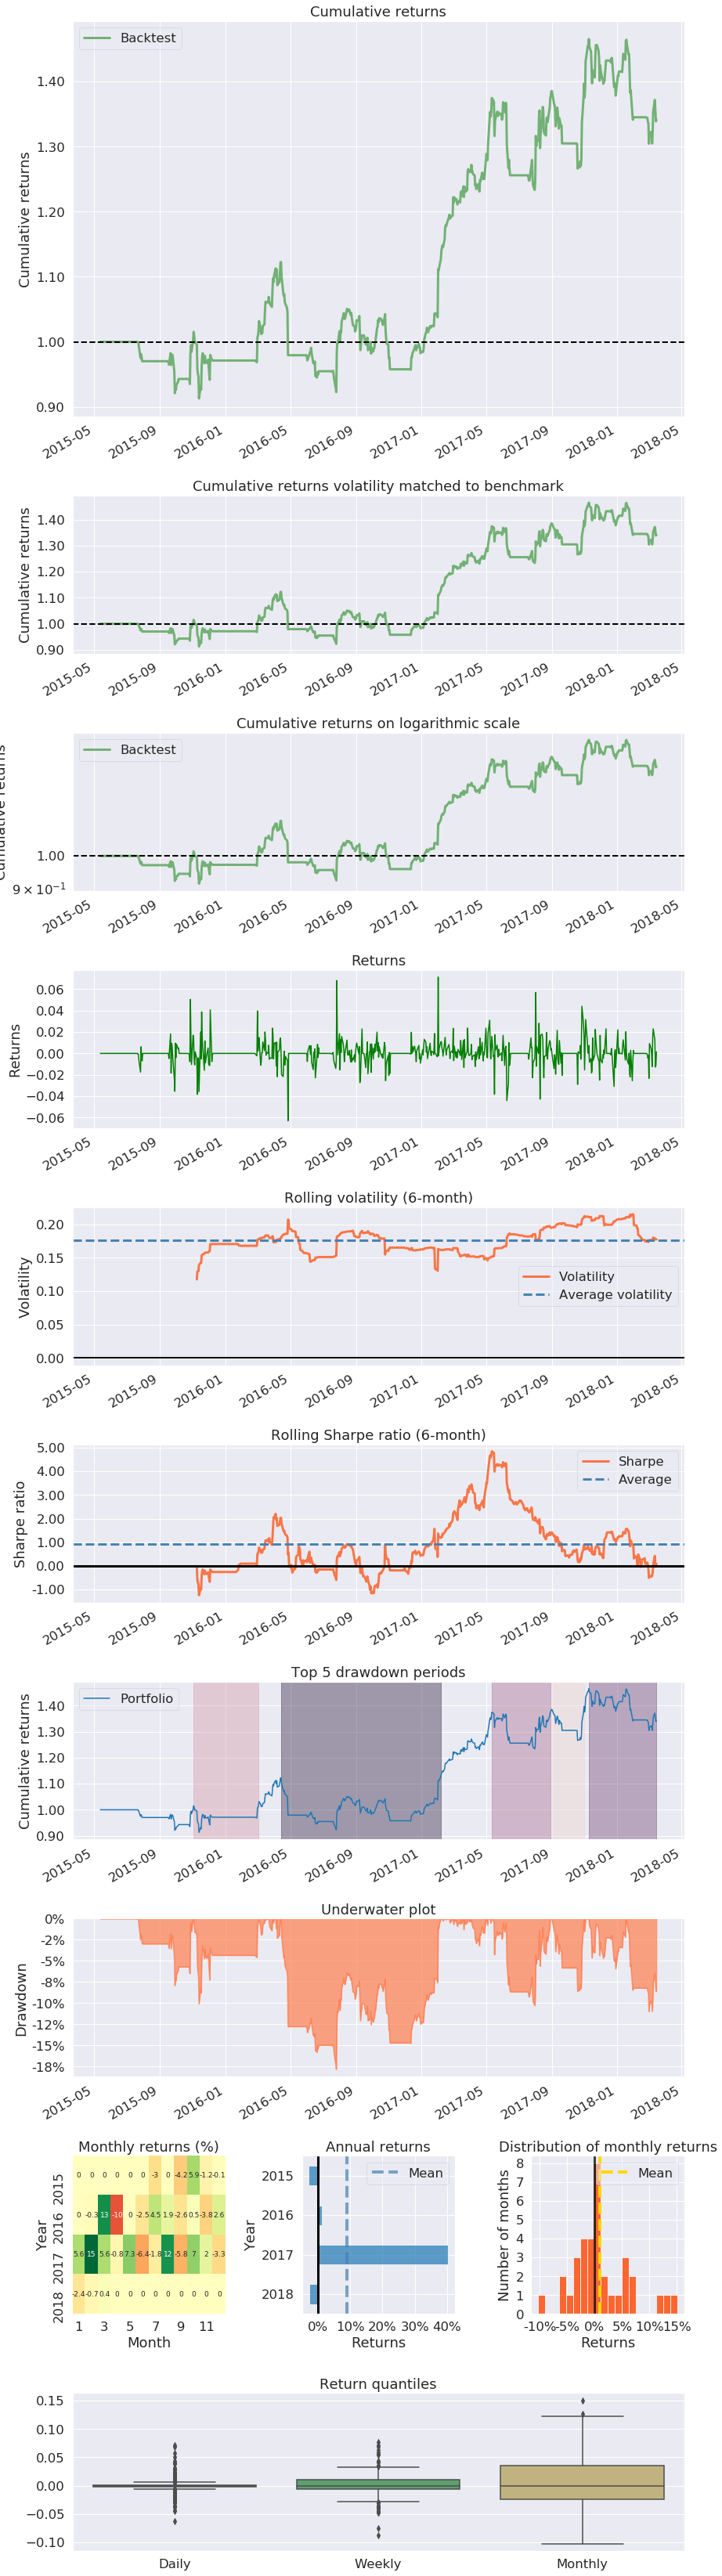

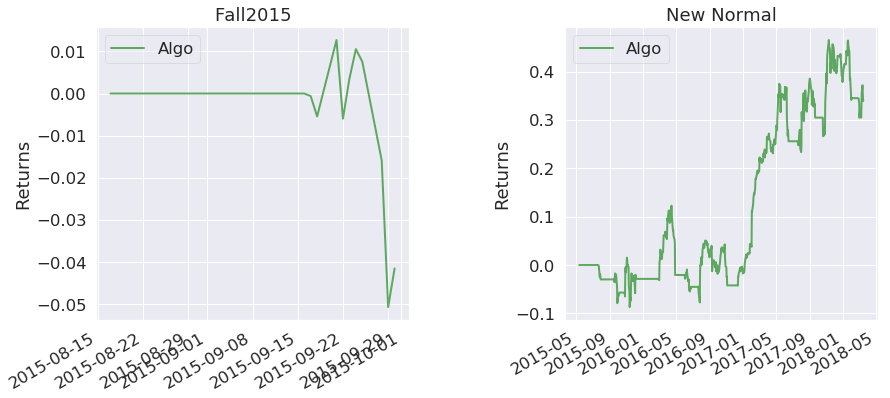

In [71]:
pf.create_full_tear_sheet(returns)

## Individual Pyfolio's plots

We will customise the plots for more in-depth analysis (see [Quantopian's lecture](#https://www.quantopian.com/lectures/portfolio-analysis) for more information). As a reminder, it is adviced in Zipline's version 1.4 to set benchmark to false, and subsequently, we have no benchmark data.

In [3]:
[f for f in dir(pf.plotting) if 'plot_' in f]

['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

### Cumulative returns

Cumulative returns of 34,1% over the whole period.

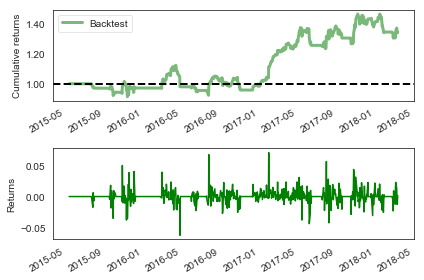

In [31]:
# Cumulative Returns
sns.set_style("white")
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(returns)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(returns)
plt.tight_layout()

### Distribution of returns

The graphs on distribution of returns gauge how the algorithm performs on a yearly and monthly basis. It particularly performs well in 2017, the first quarter of the year and in June, August and October (above 5%). The distribution of the monthly returns of this strategy are similar to the returns of the stock (<code>01_eda_quandl.ipynb</code>).

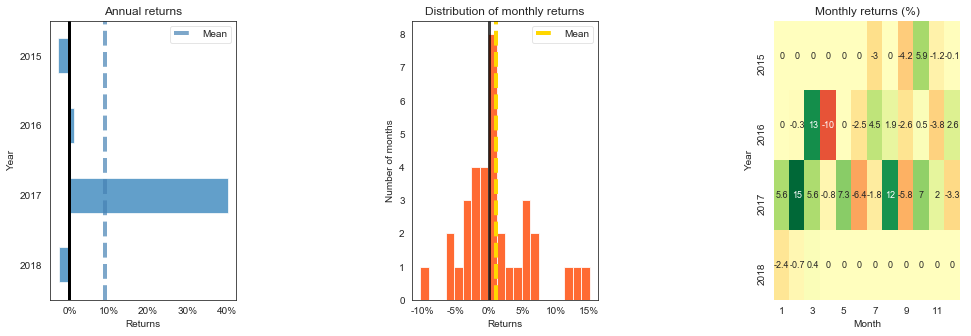

In [32]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(returns)
plt.tight_layout()
fig.set_size_inches(15,5)

Box and whiskers are illustrative of the median, quarters returns (25th and 75th percentile) and outliers. Monthly, we can see that the whiskers (returns falling out of the 25th - 75th percentiles) rank +/-10%, which reflect that returns are spread out. This is not ideal when these outliers are negative. The trading strategy should conveniently handle volatility.

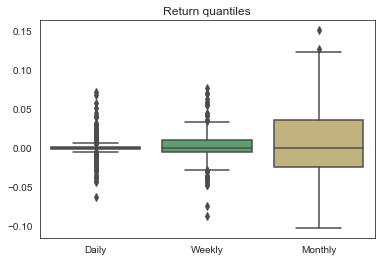

In [33]:
pf.plot_return_quantiles(returns);

### Rolling plots

Rolling plots which show how an estimate changes throughout backtest period. A Sharpe ratio is the average return earned in excess of risk-free asset over its volatility, it is a mesure of portfolio performance. A volatile Sharpe ratio may indicate that the strategy may be riskier or non-performing at certain time points.<br>
In this particular case, the Sharpe ratio has been around 1% except in 2017 peaking at 5% (this also coincides with great returns). It should be explored if any market-events influencing this behaviour occurred during that period.

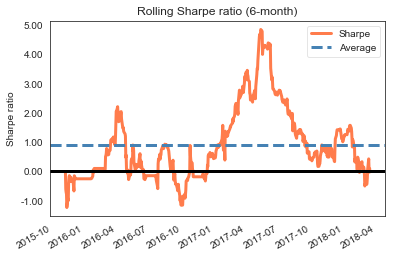

In [34]:
pf.plot_rolling_sharpe(returns);

### Drawdown graphs

The first graph portrays the top 5 drawdown periods measured in terms of cumulative returns and the second graph depicts percentage drawdown. Both plots allow for a quick check into the time periods during which the algorithm fare with difficulties. Broadly speaking, the less volatile an algorithm is, the more minimal the drawdowns.<br>
In 2016, the strategy endured several drawdowns with a major one reaching -17.8%.

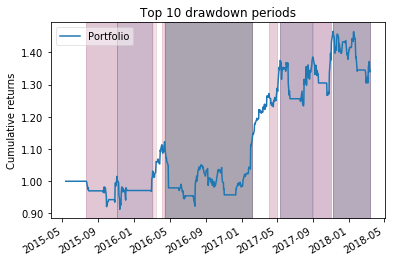

In [6]:
pf.plot_drawdown_periods(returns);


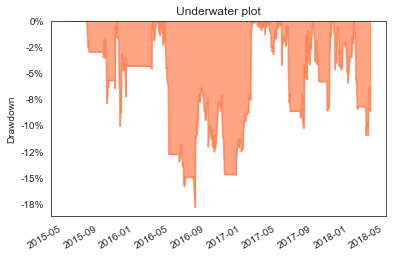

In [48]:
pf.plot_drawdown_underwater(returns);

### Gross leverage ratio

This is an important ratio as it affects how you trade on margin. <br>
Good strategies generally start with an initial leverage of 1, which can be adapted upon strategy's viability. A lower Sharpe ratio indicates that the strategy has a higher volatility per unit return, making it more risky to lever up. On the other hand, a higher Sharpe ratio indicates lower volatility per unit return, allowing you to increase the leverage and correspondingly, returns.<br>
For this strategy, 2016 has definitely been a risky year.

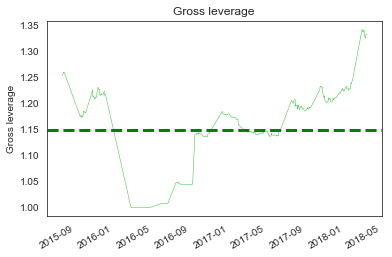

In [37]:
pf.plot_gross_leverage(returns, positions);

### Daily turnover

This plot reflects how many shares are traded as a fraction of total shares, which can be indicative of the transaction costs associated to the algorithm but also provide a better out of sample estimation.

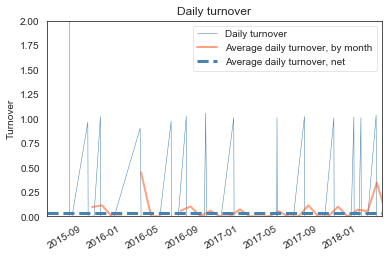

In [40]:
pf.plot_turnover(returns, transactions, positions);

**Final note**<br>
Convert Notebook to Markdown and graphs to .png format for conclusions' presentation.

In [16]:
!jupyter nbconvert 02_ta_strategy.ipynb --to markdown 

[NbConvertApp] Converting notebook 02_ta_strategy.ipynb to markdown
[NbConvertApp] Support files will be in 02_ta_strategy_files/
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Making directory 02_ta_strategy_files
[NbConvertApp] Writing 47892 bytes to 02_ta_strategy.md
